In [1]:
import yfinance as yf
import numpy as np

In [2]:
df = yf.download("^NSEI",start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0
...,...,...,...,...,...,...
2022-06-24,15657.400391,15749.250000,15619.450195,15699.250000,15699.250000,219600
2022-06-27,15926.200195,15927.450195,15815.500000,15832.049805,15832.049805,210900
2022-06-28,15757.450195,15892.099609,15710.150391,15850.200195,15850.200195,251900


In [4]:
df['returns'] = np.log(df.Close.pct_change() + 1)

In [5]:
def lagit(df,lags):
    names=[]
    for i in range(1,lags+1):
        df['Lag_'+str(i)] = df['returns'].shift(i)
        names.append('Lag_'+str(i))
    return names

In [6]:
lagsnames = lagit(df,5)

In [7]:
lagsnames

['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']

In [8]:
df.dropna(inplace=True)

In [9]:
from sklearn.model_selection import train_test_split 

In [10]:
train,test = train_test_split(df,shuffle=False,test_size=0.3,random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
train =train.copy()
test = test.copy()

In [14]:
train

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,
2010-01-12,5251.100098,5300.500000,5200.950195,5210.399902,5210.399902,0,-0.007457,0.000886,-0.003493,-0.003547,0.000739,0.008696
2010-01-13,5212.600098,5239.200195,5169.549805,5233.950195,5233.950195,0,0.004510,-0.007457,0.000886,-0.003493,-0.003547,0.000739
2010-01-14,5234.500000,5272.850098,5232.500000,5259.899902,5259.899902,0,0.004946,0.004510,-0.007457,0.000886,-0.003493,-0.003547
2010-01-15,5259.899902,5279.850098,5242.450195,5252.200195,5252.200195,0,-0.001465,0.004946,0.004510,-0.007457,0.000886,-0.003493
2010-01-18,5253.649902,5292.500000,5228.950195,5274.850098,5274.850098,0,0.004303,-0.001465,0.004946,0.004510,-0.007457,0.000886
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-01,10930.900391,11035.650391,10821.549805,11008.299805,11008.299805,387000,0.007097,-0.004300,-0.006922,-0.001234,0.009081,-0.015893
2018-10-03,10982.700195,10989.049805,10843.750000,10858.250000,10858.250000,386800,-0.013724,0.007097,-0.004300,-0.006922,-0.001234,0.009081
2018-10-04,10754.700195,10754.700195,10547.250000,10599.250000,10599.250000,425100,-0.024142,-0.013724,0.007097,-0.004300,-0.006922,-0.001234


In [15]:
model.fit(train[lagsnames],train['returns'])

LinearRegression()

In [16]:
test['prediction_LR'] = model.predict(test[lagsnames])

In [17]:
test['direction_LR'] = [1 if i > 0 else -1 for i in test.prediction_LR]

In [18]:
test['start_LR'] = test['direction_LR']* test['returns']

In [19]:
np.exp(test[['returns','start_LR']].sum())

returns     1.524949
start_LR    1.258507
dtype: float64

<AxesSubplot:xlabel='Date'>

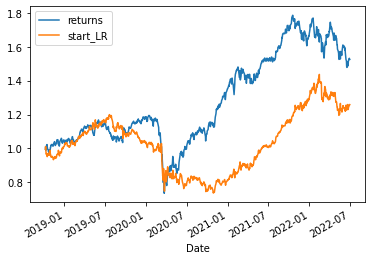

In [20]:
np.exp(test[['returns','start_LR']].cumsum()).plot()

In [21]:
(test['direction_LR'].diff() != 0 ).value_counts()

False    478
True     440
Name: direction_LR, dtype: int64

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
s_pre = model.predict(test[lagsnames])
s_pre

array([ 1.77580490e-03,  8.21048509e-04,  2.25662497e-03, -1.81047450e-03,
        2.51853923e-03, -1.61129120e-04,  1.24467944e-03, -1.58116577e-03,
       -6.02515904e-04,  1.14206695e-04,  2.34059783e-04,  1.53154139e-03,
       -3.87721237e-04,  5.28726133e-06,  1.98536643e-03, -1.30619711e-04,
        1.84812229e-03, -7.58460699e-04,  1.63703365e-03, -8.05113999e-04,
        3.47673257e-04,  3.21059448e-04,  2.18440980e-04, -4.87394789e-04,
        1.06051050e-03,  2.16733556e-04,  8.12484930e-04,  3.81380208e-04,
        7.71924425e-04, -7.77971786e-04, -1.13554724e-04, -2.11231237e-04,
        1.56301748e-03,  6.96418720e-04,  6.02909855e-04,  7.73951151e-04,
        2.12611397e-05,  1.14317843e-04, -1.59645066e-04, -2.75610843e-04,
       -8.04161336e-04,  1.44570139e-03, -9.47739053e-04,  1.55782755e-03,
        1.38440820e-03,  8.72332628e-04, -1.03730679e-04,  3.09927804e-04,
        1.95390717e-04,  5.87583916e-04, -1.49579172e-04, -1.11160150e-03,
       -7.95467749e-05,  

In [24]:

# test['returns'].to_array()

In [26]:
# confusion_matrix(test['returns'],s_pre)